## Assignment 1b: Time Series Forecasting

### \<Paridhi Awadheshpratap Singh> \<a1865487>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [34]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smt
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler

In [36]:
# Reading the dataset
filename = '/content/drive/MyDrive/mining big data/energydata_complete.csv'

energy = pd.read_csv(filename)
energy['date'] = pd.to_datetime(energy['date']) # converting the date column to pandas datetime
energy['date'].dtype
energy = energy.set_index('date') # setting index to date
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [37]:
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [38]:
# Checking the data types of all varables
energy.dtypes

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

### 2. Analyse and visualise the data

* The dataset spans approximately 4.5 months, with temperature and humidity monitored using a ZigBee wireless sensor network transmitting data every 3.3 minutes.
* This data was averaged over 10-minute intervals. Energy consumption data was recorded every 10 minutes using m-bus energy meters. Weather data from Chievres Airport, Belgium, obtained from Reliable Prognosis, was merged with the experimental data based on date and time.
* Additionally, two random variables were introduced to test regression models and filter out non-predictive attributes.

As mentioned in the Appliances Energy Prediction[1] there are no missing values in the dataset, to verify this assumption we have plotted a graph of the percentage of missing values for each variable.

The primary objective was to forecast the total energy consumption of household appliances, represented as continuous numerical data measured in watt-hours (Wh) and recorded every 10 minutes. Inclusion of lighting usage proved beneficial, as it served as a dependable indicator of room occupancy, particularly when coupled with relative humidity measurements. All data processing and modeling tasks were conducted using Python, specifically on Google Colab. The dataset spanned 137 days (equivalent to 4.5 months). Outdoor variables were monitored through a nearby airport weather station, encompassing temperature, pressure, humidity, wind speed, visibility, and dew point temperature. This was undertaken to assess the influence of external conditions on appliance energy consumption.

Note: Any data not recorded at 10-minute intervals were averaged over such periods to facilitate successful integration.[2]

<ipython-input-39-7e46dd800ab8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




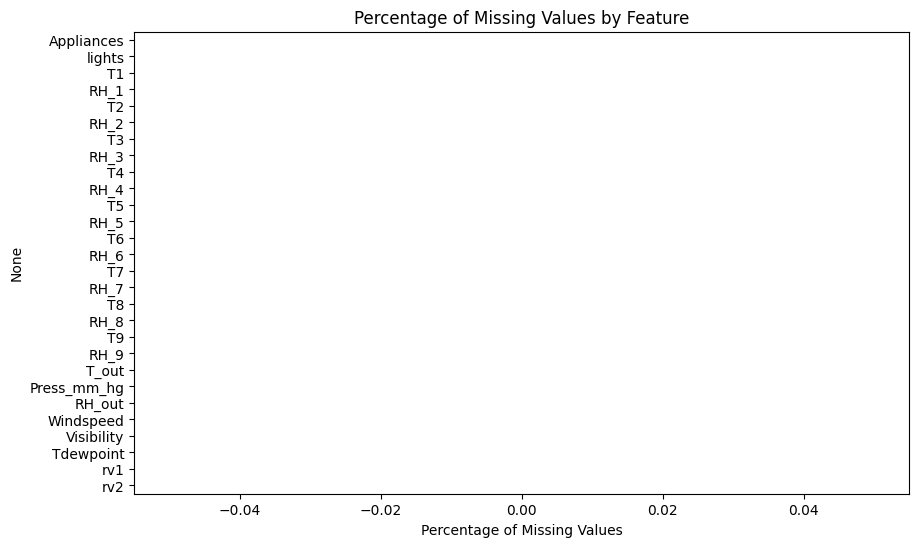

In [39]:

# Plot to represent the percentage of missing values for each variable
missing_percentages = (energy.isnull().sum() / len(energy)) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentages.values, y=missing_percentages.index, palette='viridis')
plt.xlabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Feature')
plt.show()


The above plot confirms our assumption that there are no missing values in the dataset.

A time series is considered stationary if its statistical properties, such as mean, variance, and covariance, do not change over time. This implies no dependency on time for these properties.[3]

We have created a function that will:
1.  Plot the time series data.
2. Perform the Dickey-Fuller test to check stationarity and print the test results.
3. Plot the autocorrelation and partial autocorrelation functions.
4. If the time series is non-stationary (p-value > 0.05), it will perform decomposition using seasonal decomposition and plot the components (observed, trend, seasonal, and residual).[3]

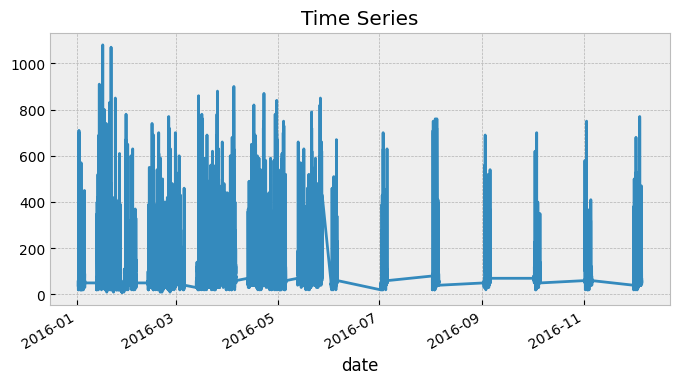

Dickey-Fuller Test:
ADF Statistic: -21.616378
p-value: 0.000000
Critical Values:
	1%: -3.430681600227742
	5%: -2.8616865555329394
	10%: -2.566848007525354


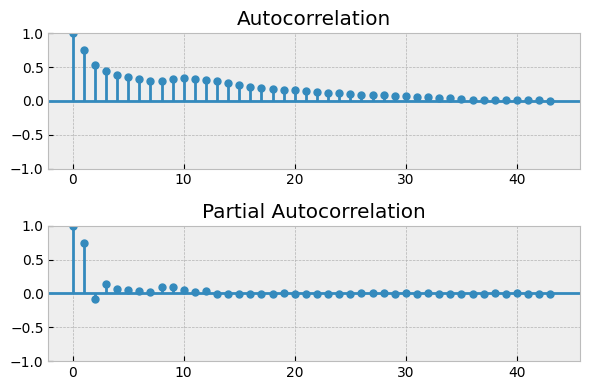

Time series is stationary.


In [40]:
# Function to check stationarity in the time series dataset
# source : ChatGPT 3.5
# Prompt: create a function to check the time series for stationarity. If the time series is non-stationary, then it is necessary to decompose it into components. Also include plots of auto correlation, partial autcorrelation and produce plots regardless of stationarity

def check_stationarity(y, lags=None, figsize=(8, 4), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # Plot time series
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=figsize)
        y.plot(ax=ax)
        ax.set_title('Time Series')
        plt.show()

    # Check stationarity using Dickey-Fuller test
    adf_result = sm.tsa.adfuller(y)
    print("Dickey-Fuller Test:")
    print("ADF Statistic: %f" % adf_result[0])
    print("p-value: %f" % adf_result[1])
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value}")

    # Plot auto correlation and partial auto correlation
    with plt.style.context(style):
        fig, ax = plt.subplots(2, 1, figsize=(6, 4))
        smt.plot_acf(y, lags=lags, ax=ax[0], alpha=0.5)
        ax[0].set_title('Autocorrelation')
        smt.plot_pacf(y, lags=lags, ax=ax[1], alpha=0.5)
        ax[1].set_title('Partial Autocorrelation')
        plt.tight_layout()
        plt.show()

    # Decompose time series if non-stationary
    if adf_result[1] > 0.05:
        print("Time series is non-stationary. Performing decomposition...")
        decomposition = seasonal_decompose(y)
        with plt.style.context(style):
            fig, ax = plt.subplots(4, 1, figsize=(8, 6))
            decomposition.observed.plot(ax=ax[0])
            ax[0].set_title('Observed')
            decomposition.trend.plot(ax=ax[1])
            ax[1].set_title('Trend')
            decomposition.seasonal.plot(ax=ax[2])
            ax[2].set_title('Seasonal')
            decomposition.resid.plot(ax=ax[3])
            ax[3].set_title('Residual')
            plt.tight_layout()
            plt.show()
    else:
        print("Time series is stationary.")

# Example usage:
# Assuming 'data' is your time series data
# check_stationarity(data)




check_stationarity(energy['Appliances'])


Out of curiosity, we'll develop a function to extend the time series and also to visualize its components.

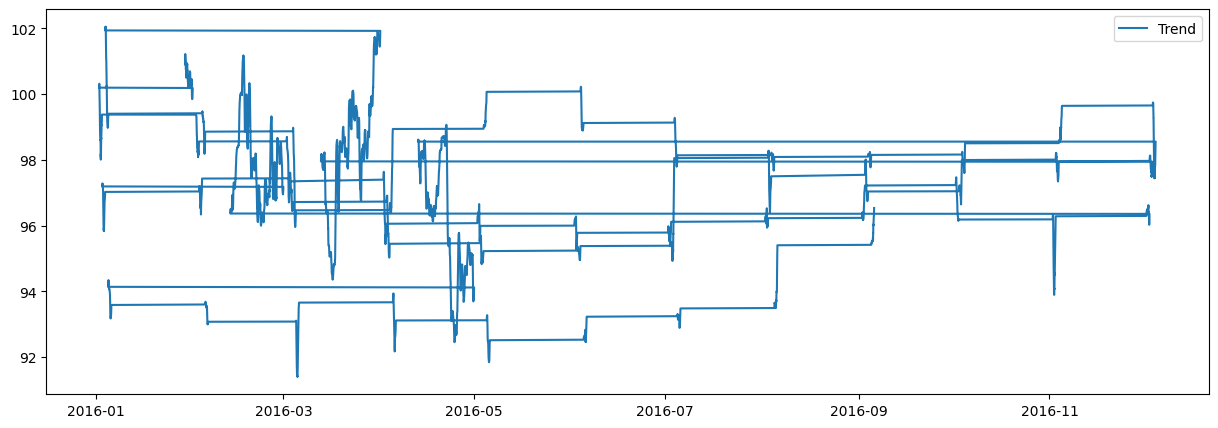

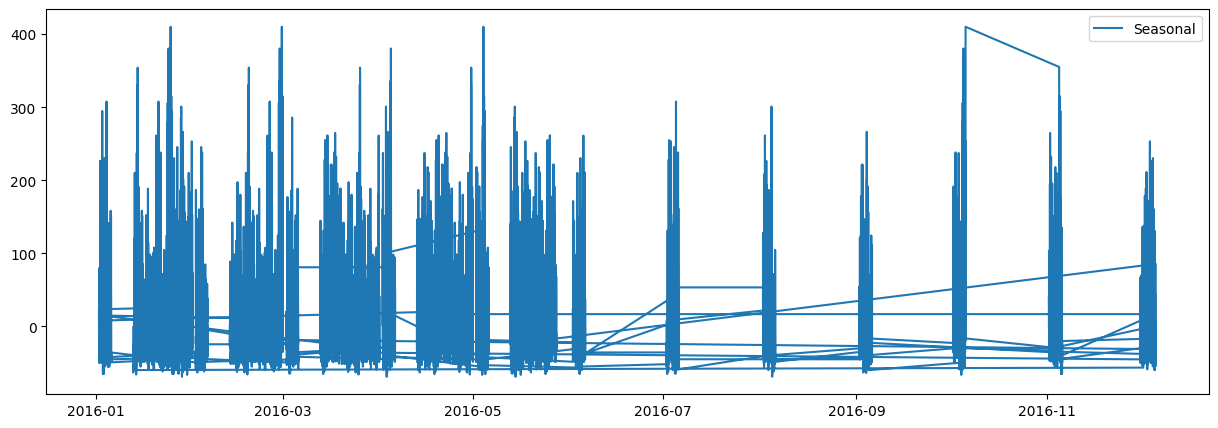

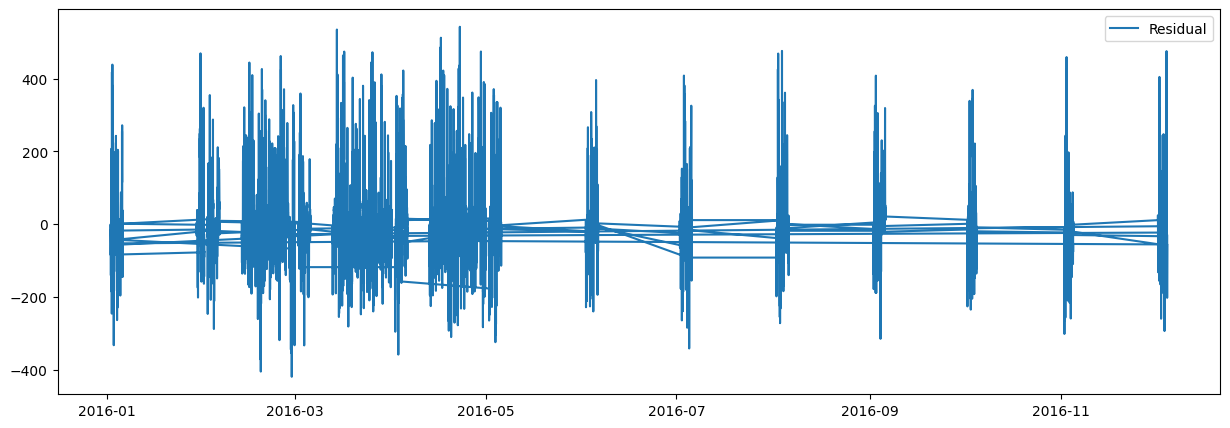

In [41]:
# Residential Power. Prophet with TimeSeries.[4]
def decomposition_and_plot(dataset,target):
  ts_decomposition = seasonal_decompose(x=dataset[target],period=5136)
  trend_estimate = ts_decomposition.trend
  seasonal_estimate = ts_decomposition.seasonal
  residual_estimate = ts_decomposition.resid

  plt.figure(figsize=(15,5))
  plt.plot(trend_estimate, label='Trend')
  plt.legend()

  plt.figure(figsize=(15,5))
  plt.plot(seasonal_estimate, label='Seasonal')
  plt.legend()

  plt.figure(figsize=(15,5))
  plt.plot(residual_estimate, label='Residual')
  plt.legend()
  return plt.show()

decomposition_and_plot(energy,'Appliances')


From the above graphs we conclude that

* the trend appears to exhibit fluctuating patterns with both upward and downward movements, indicating volatility or instability. Interpretation of the trend involves recognizing upward spikes as periods of growth or positive trends, while downward spikes indicate declines or negative trends. The irregular pattern observed may stem from external factors or inherent noise in the data. It's essential to investigate the underlying reasons for these fluctuations and consider whether they align with expectations or business context.

* The seasonal component of a time series reveals recurring patterns that occur at regular intervals, such as daily, monthly, or yearly cycles. In the provided graph, we observe distinctive patterns with fluctuating data points throughout the year 2016. These cyclic variations indicate periodic changes in the data, with peaks and valleys suggesting seasonal effects influenced by specific months, holidays, or other recurring events. It's important to identify the underlying causes of these fluctuations, such as external factors like weather or business cycles, and consider how the seasonal pattern impacts analysis or forecasting efforts.

* The residual component, observed as fluctuating blue bars alongside a line in the graph, represents the unexplained variations or noise in the data after removing the trend and seasonal patterns. Ideally, residuals should appear as random noise without discernible patterns, but in this graph, some structure is evident. It's important to investigate any patterns or trends in the residuals, such as consistent positive or negative deviations over specific time periods, and consider whether there is autocorrelation, indicating dependence on previous values.

As seen in **describe()** function, there is a vast difference between the min and max values of the appliances.

We do the log transformation of the **appliances** variable to check if the results produced are better using the **decomposition_and_plot()** function.

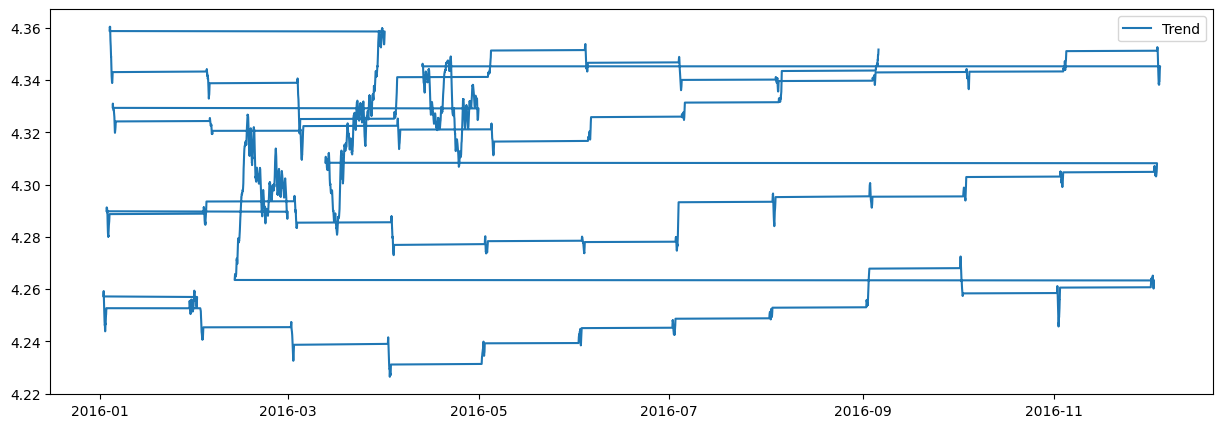

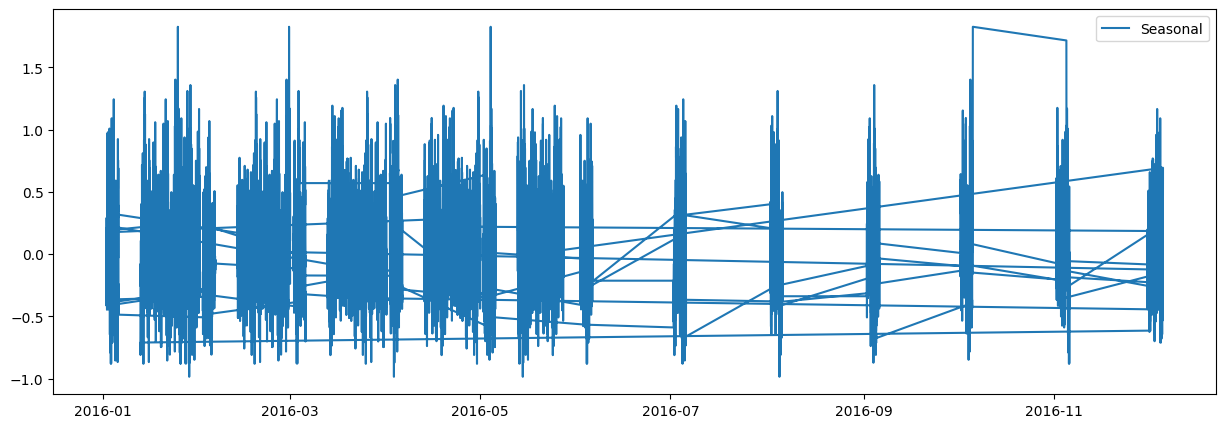

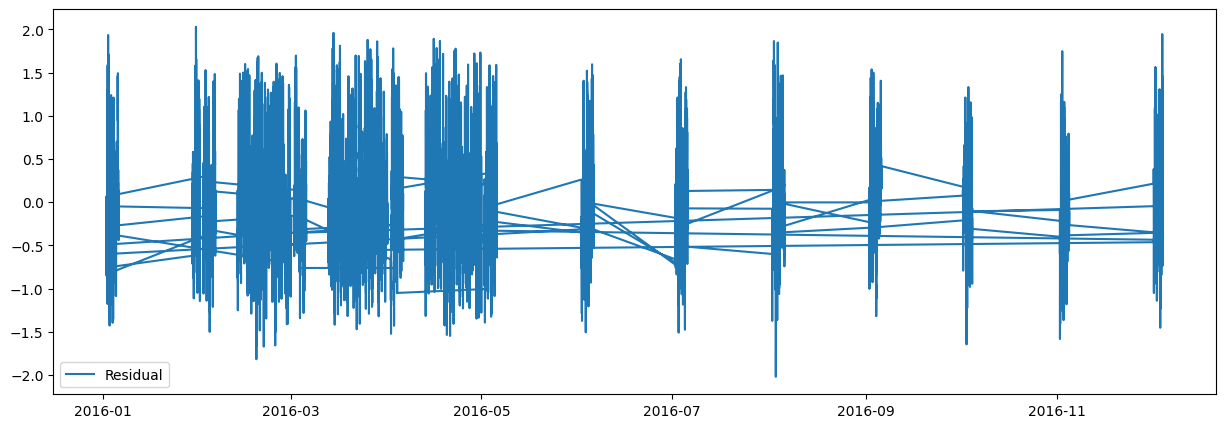

In [42]:
energy_copy = energy.copy()
energy_copy['log_appliances'] = np.log(energy_copy['Appliances'])
decomposition_and_plot(energy_copy, 'log_appliances')

From the above graphs it is clear that log transformation does not provide significantly better results, though the graphs are definitely cleaner.

We next create a distribution density visualization function for the target variable.

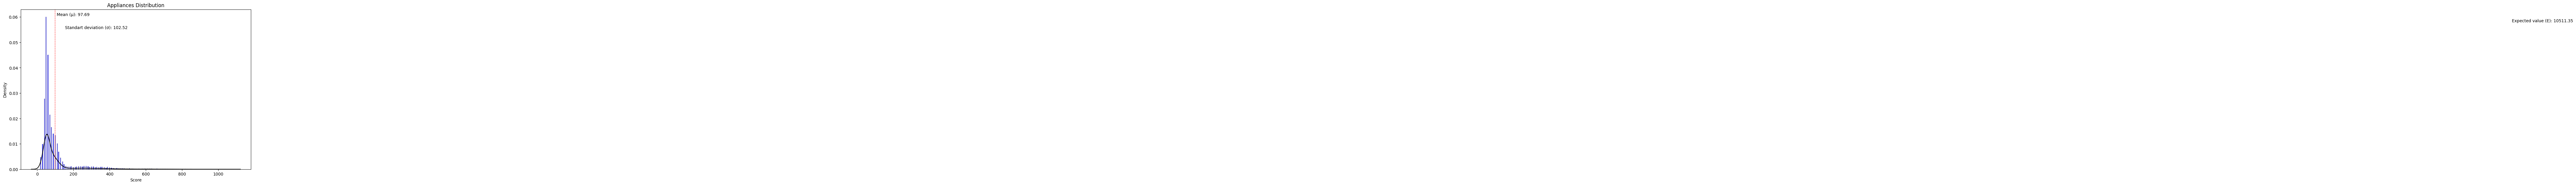

In [43]:
# Residential Power. Prophet with TimeSeries.[4]
def Plot_distribution_target(dataset,target):
  plt.figure(figsize=(10,7))
  plt.title("{target} Distribution".format(target = target))
  sns.histplot(dataset[target], stat='density',color='blue')
  sns.kdeplot(dataset[target], color='black')
  plt.axvline(dataset[target].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(dataset[target].mean()*1.1, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(dataset[target].mean()))
  plt.text(dataset[target].var()*1.3, max_ylim*0.92, 'Expected value (E): {:.2f}'.format(dataset[target].var()))
  plt.text(dataset[target].std()*1.5, max_ylim*0.88, 'Standart deviation (σ): {:.2f}'.format(dataset[target].std()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

Plot_distribution_target(energy, 'Appliances')



The data does not follow a Gaussian distribution; instead, it exhibits a long tail, and there is a notable presence of outliers, as indicated by the high standard deviation. To further investigate the presence of outliers, we will examine a boxplot of the data.

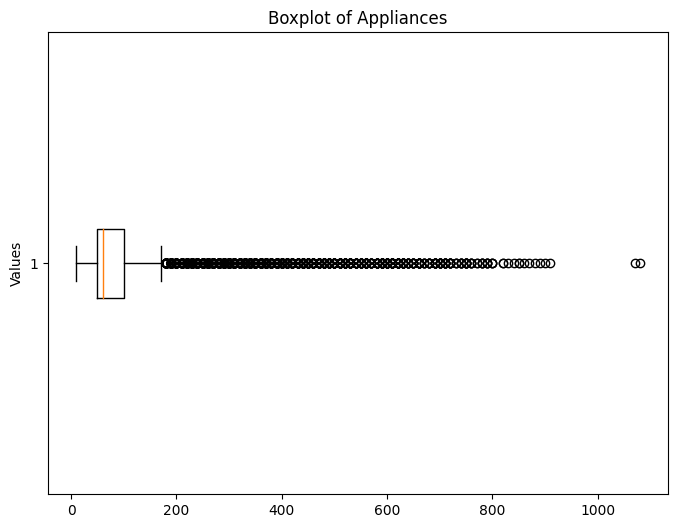

In [44]:
def plot_boxplot(dataset, feature_name):
    """
    Function to create a boxplot of a specified feature in the dataset.

    Parameters:
    - dataset: DataFrame containing the dataset
    - feature_name: Name of the feature for which to create the boxplot
    """
    plt.figure(figsize=(8, 6))
    plt.boxplot(dataset[feature_name], vert = False)
    plt.title('Boxplot of ' + feature_name)
    plt.ylabel('Values')
    plt.show()

plot_boxplot(energy, 'Appliances')

The plot indicates the presence of outliers in the target variable, particularly at the upper end of the distribution.

Given the dataset's notable standard deviation, it is suggested to examine the unit differences of the target feature.

In [45]:
def plot_diff(dataset,target):
  tempdiff=dataset[target].diff(periods=1).dropna()
  fig = go.Figure(data=[go.Histogram(x=tempdiff,histnorm='probability density')])
  fig.update_layout(
    title="Histogram of unit differences of target feature",
    title_x = 0.5,
    xaxis_title="Unit difference",
    yaxis_title="Probability Density",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
  return fig.show()

plot_diff(energy, 'Appliances')

While the data exhibits a normal distribution, there is a concern about addressing the extended tail. To mitigate this issue, we will attempt to transform the target variable by taking its logarithm.

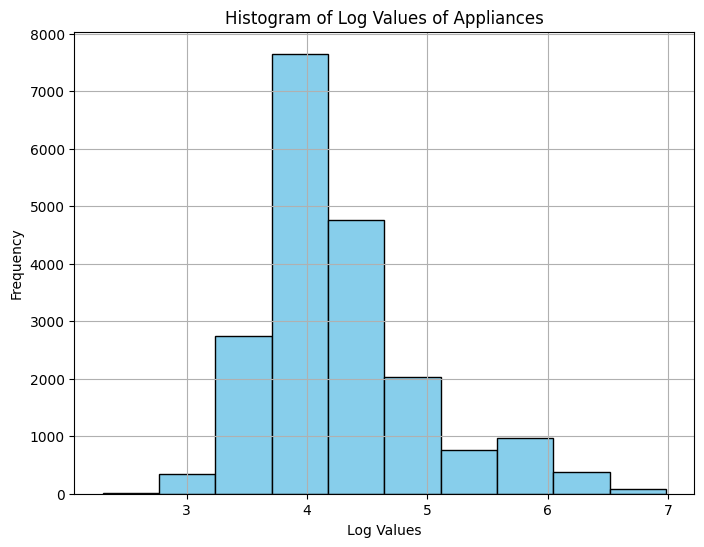

In [46]:
def plot_histogram(data, feature_name):
    plt.figure(figsize=(8, 6))
    plt.hist(np.log(data[feature_name]), bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Log Values of ' + feature_name)
    plt.xlabel('Log Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_histogram(energy, 'Appliances')

We have successfully addressed the issue of extended tails; however, the feature does not exhibit a normal distribution.

Let's look at the exponential smoothing curves.

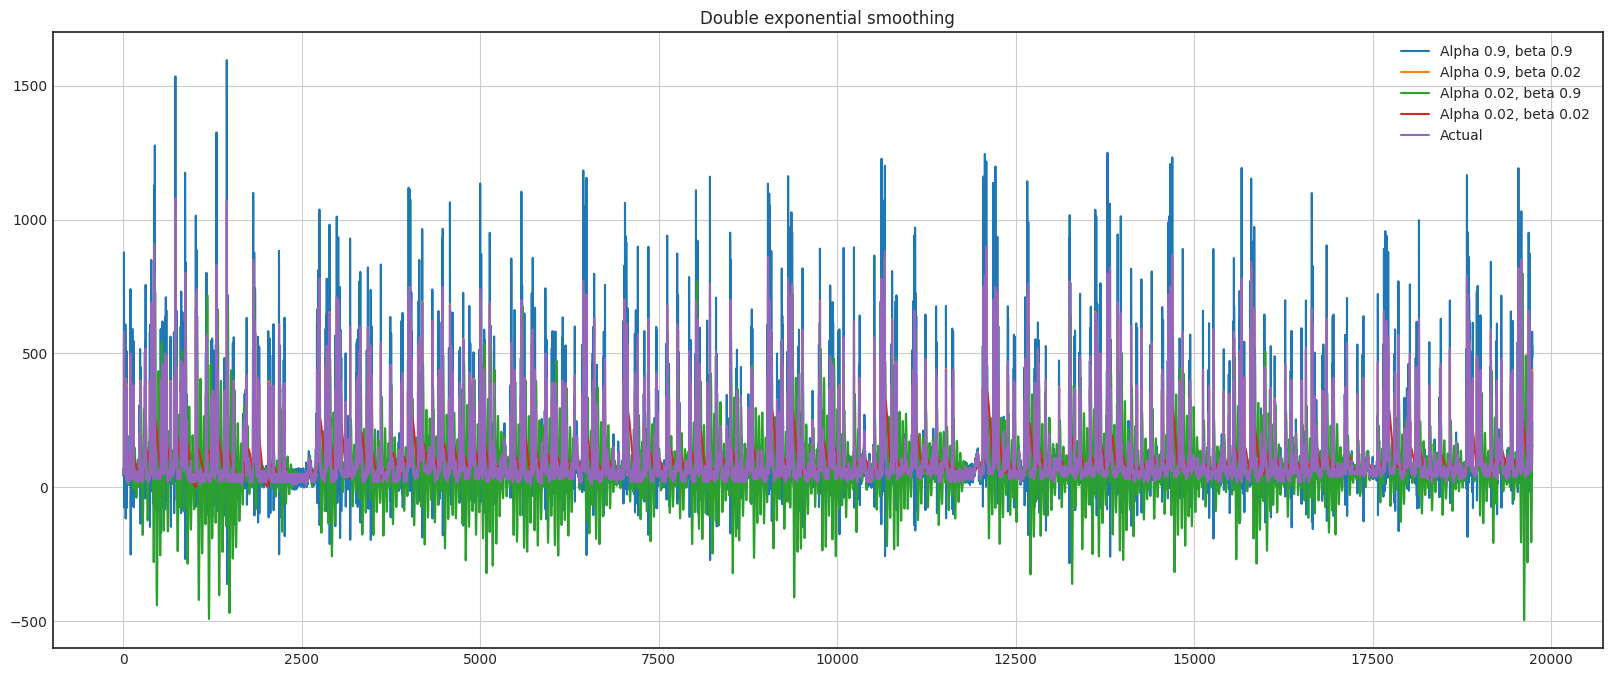

In [47]:

# Source: Residential Power. Prophet with TimeSeries.[4]
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # predict
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result


with plt.style.context('seaborn-white'):
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(energy['Appliances'], alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(energy['Appliances'].values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double exponential smoothing")
    plt.grid(True)


### 3. Pre-process the data


As discussed in the *Data-Driven Modeling of Appliance Energy Usage*[2] we too will employee two major techniques for our pre processing.

1. Correlation Analysis : is a useful tool to determine the relationship between multiple variables. By uncovering the correlation between variables, it enables comprehension of their mutual influence and potential interactions within the analysis. This insight proves beneficial in various ways, including the identification and elimination of variables demonstrating insufficient correlation with other features. Additionally, it aids in uncovering distinct relationships that may not be immediately apparent during the initial data review.

2. Feature Engineering : on other hand is used to create new features from the existing ones. This aids in offering more pertinent and valuable insights. In certain instances, specific characteristics can undergo alteration and standardization to a defined range, potentially minimizing data inconsistencies. The consequences of both approaches for this examination will be elaborated upon in subsequent sections[2].

In [48]:
features = energy.columns.tolist()

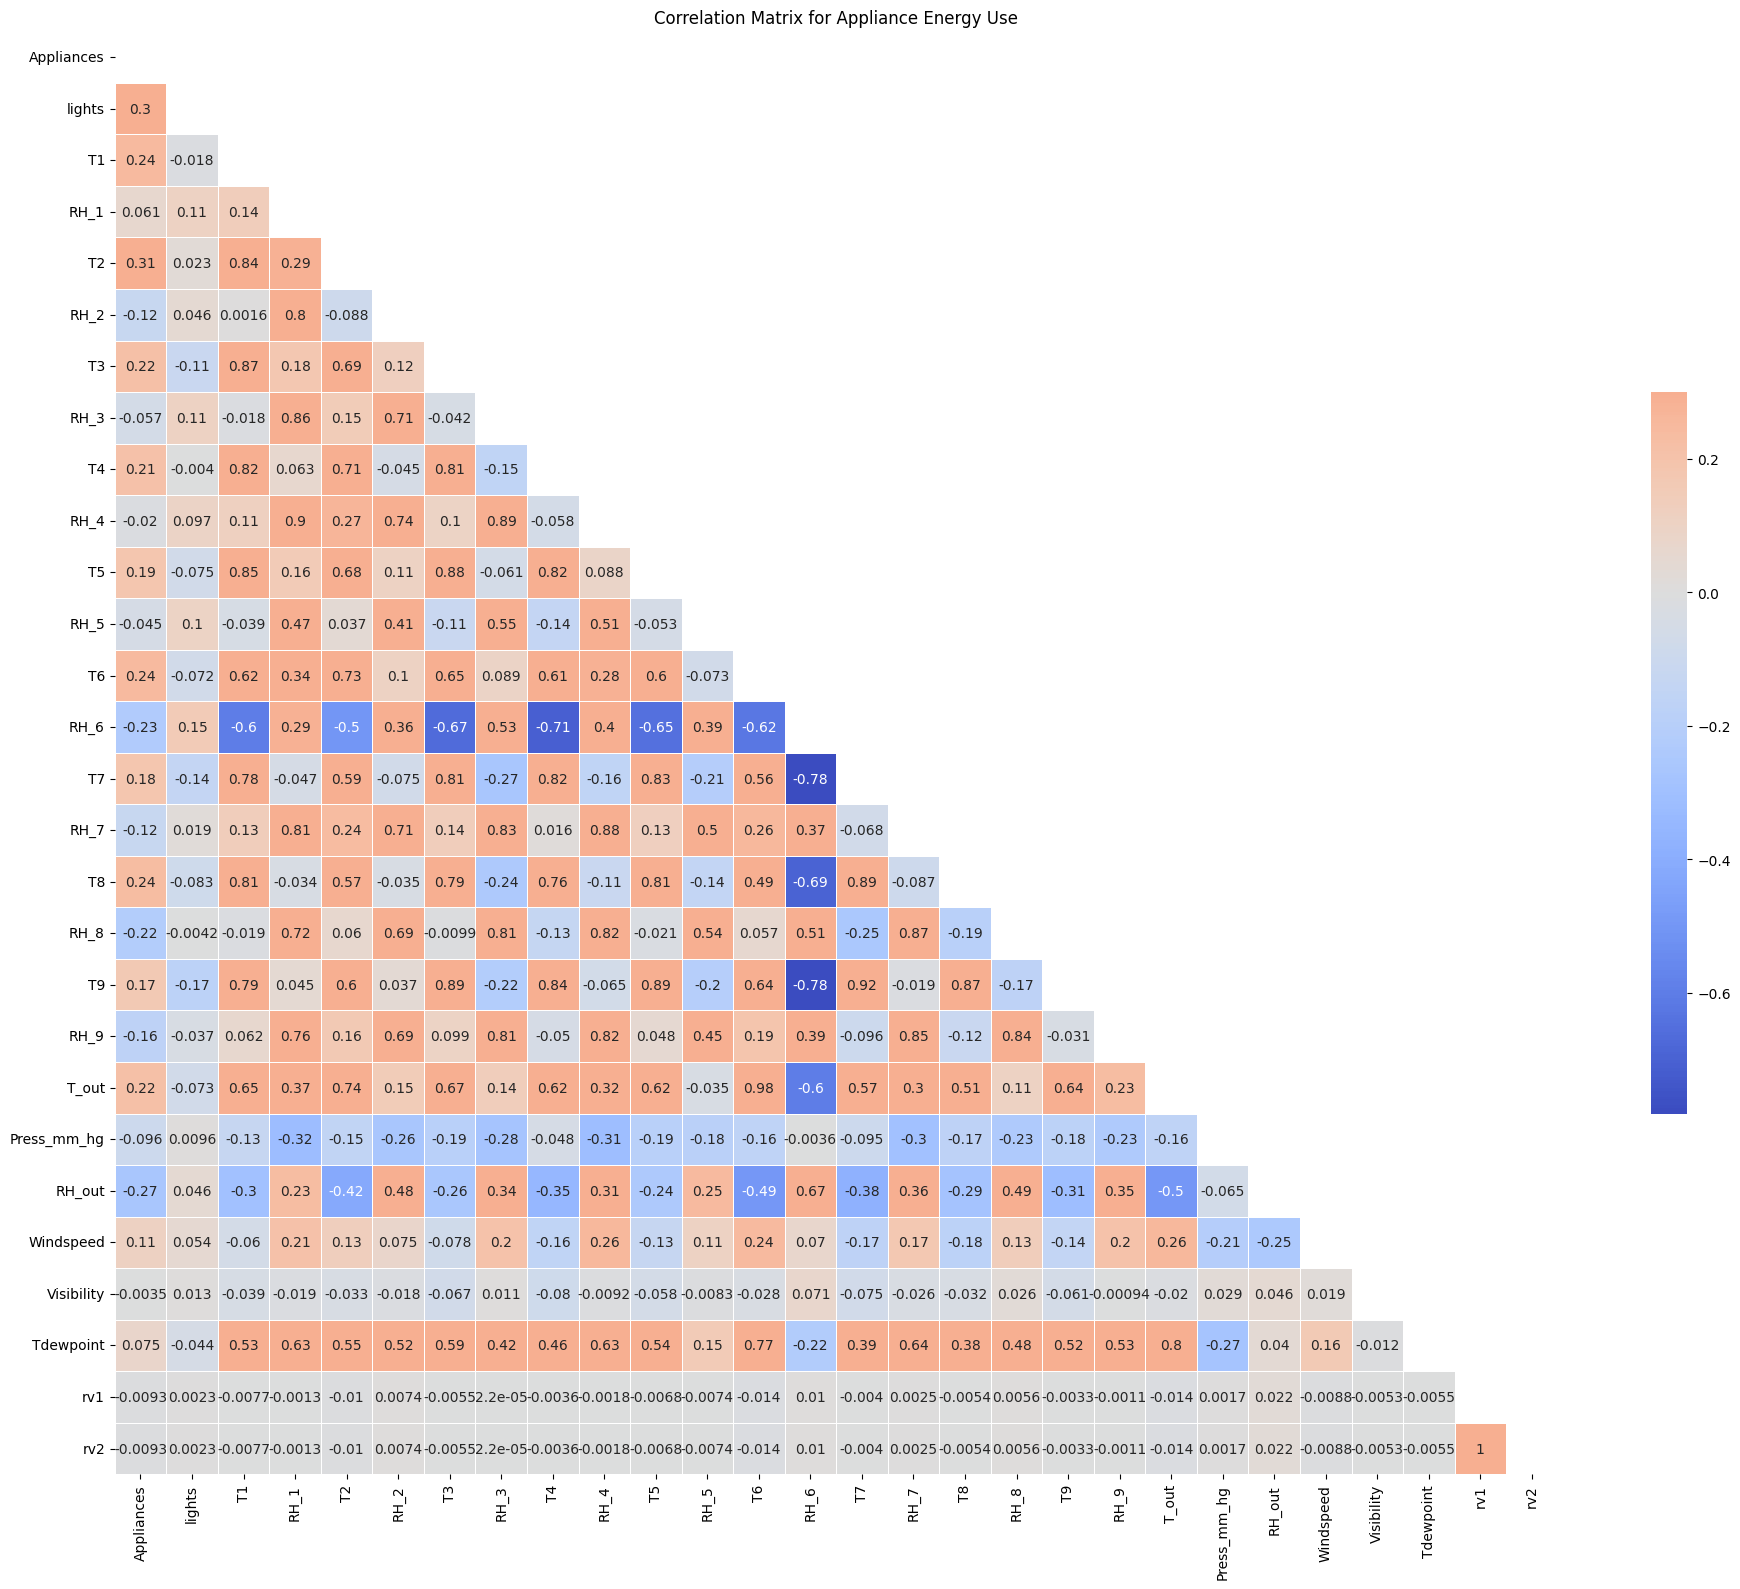

In [49]:

# Calculate the correlation matrix
correlation_matrix = energy.corr(method='spearman')

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add title and format the figure
plt.title('Correlation Matrix for Appliance Energy Use')
plt.tight_layout()

# Show the plot
plt.show()


* As depicted in the Figure, notable variables identified include lighting consumption and T2 at 0.3.

* Both lighting and appliance energy usage represent significant contributors to energy consumption, not only within households but also in commercial buildings.

* Given that T2 denotes the living room temperature, and considering that the living room tends to be the most frequented space in a household, fluctuations in temperature within such a highly utilized area can substantially influence appliance usage patterns.

* Regarding the remaining indoor temperatures, all exhibit relatively high and positive correlations. Specifically, appliance energy usage correlates at 0.21, 0.19, and 0.24 with T4, T5, and T6, respectively.

* Additionally, correlations of 0.18, 0.24, and 0.17 are observed between appliance energy usage and T7, T8, and T9, respectively.

* A positive correlation of 0.22 is noted between appliances and outdoor temperature, while wind speed also displays a positive correlation of 0.11 with appliances.

* Visibility, on the other hand, demonstrates minimal to no correlation with appliances (-0.0035), leading to its exclusion from the dataset along with RV1 and RV2.

In [50]:
cols_to_drop = ['Visibility','rv1','rv2']
energy.drop(cols_to_drop, axis=1, inplace=True)
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,5.3
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,5.2
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,5.1
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,5.0
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,4.9


In [51]:
# Creating a new list of feartures without visibility, rv1 and rv2
features = energy.columns.tolist()
features

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Tdewpoint']

The original paper[1] introduced three additional variables derived from the raw data: NSM (number of seconds from midnight), the classification of days as weekends or workdays, and the specific day of the week. Recognizing an opportunity to enhance the dataset further, additional features were generated using the provided timestamp. Hour, month, and day features were extracted from the timestamp. Seasonal categorical data were created based on the month, resulting in four categories: autumn, winter, spring, and summer. These seasonal categories were converted into numeric form using label encoding[2].



In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with date as index
# Extract hour, month, and day from the date index
energy['hour'] = energy.index.hour
energy['month'] = energy.index.month
energy['day'] = energy.index.day

# Define a function to map months to seasons
def map_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'winter'
    elif month in [3, 4, 5]:  # Spring
        return 'spring'
    elif month in [6, 7, 8]:  # Summer
        return 'summer'
    else:  # Autumn
        return 'autumn'

# Apply the function to create the seasonal category
energy['season'] = energy['month'].apply(map_season)

# Convert seasonal categories into numeric form using LabelEncoder
label_encoder = LabelEncoder()
energy['season_numeric'] = label_encoder.fit_transform(energy['season'])

# Display the modified DataFrame
energy.head()






,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,hour,month,day,season,season_numeric
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,6.60,733.5,92.0,7.000000,5.3,17,11,1,autumn,0
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.48,733.6,92.0,6.666667,5.2,17,11,1,autumn,0
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,6.37,733.7,92.0,6.333333,5.1,17,11,1,autumn,0
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,6.25,733.8,92.0,6.000000,5.0,17,11,1,autumn,0
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,6.13,733.9,92.0,5.666667,4.9,17,11,1,autumn,0


In [53]:
# Defining the maximum values for hour, month, and day
max_hour = 23
max_month = 12
max_day = 31

# Encoding cyclic features using sine/cosine transformations
energy['hour_sin'] = np.sin(2 * np.pi * energy['hour'] / max_hour)
energy['hour_cos'] = np.cos(2 * np.pi * energy['hour'] / max_hour)
energy['month_sin'] = np.sin(2 * np.pi * energy['month'] / max_month)
energy['month_cos'] = np.cos(2 * np.pi * energy['month'] / max_month)
energy['day_sin'] = np.sin(2 * np.pi * energy['day'] / max_day)
energy['day_cos'] = np.cos(2 * np.pi * energy['day'] / max_day)

energy.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,month,day,season,season_numeric,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,11,1,autumn,0,-0.997669,-0.068242,-0.5,0.866025,0.201299,0.97953
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,11,1,autumn,0,-0.997669,-0.068242,-0.5,0.866025,0.201299,0.97953
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,11,1,autumn,0,-0.997669,-0.068242,-0.5,0.866025,0.201299,0.97953
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,11,1,autumn,0,-0.997669,-0.068242,-0.5,0.866025,0.201299,0.97953
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,11,1,autumn,0,-0.997669,-0.068242,-0.5,0.866025,0.201299,0.97953


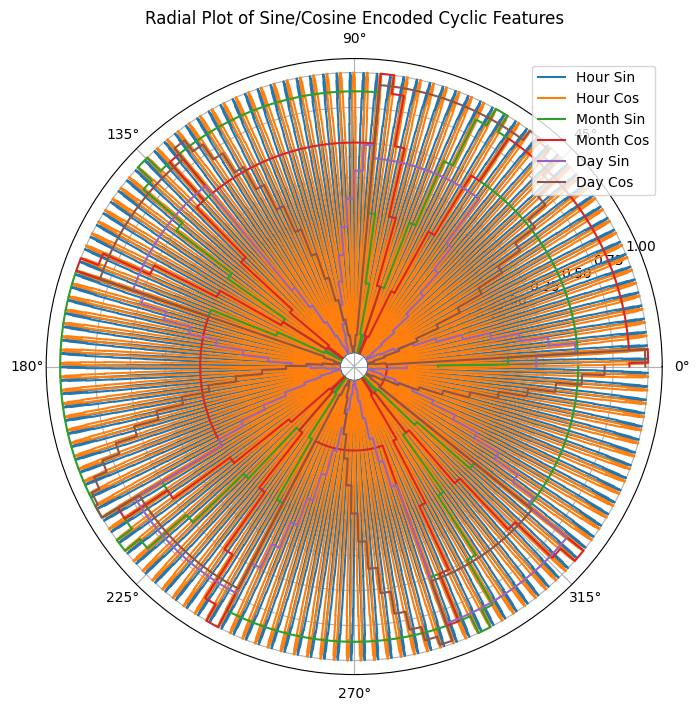

In [54]:

# Creating a radial plot
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Plotting hour features
theta = np.linspace(0, 2*np.pi, len(energy))
r = energy['hour_sin']
plt.plot(theta, r, label='Hour Sin')
r = energy['hour_cos']
plt.plot(theta, r, label='Hour Cos')

# Plotting month features
r = energy['month_sin']
plt.plot(theta, r, label='Month Sin')
r = energy['month_cos']
plt.plot(theta, r, label='Month Cos')

# Plotting day features
r = energy['day_sin']
plt.plot(theta, r, label='Day Sin')
r = energy['day_cos']
plt.plot(theta, r, label='Day Cos')

plt.title('Radial Plot of Sine/Cosine Encoded Cyclic Features')
plt.legend(loc='upper right')
plt.show()


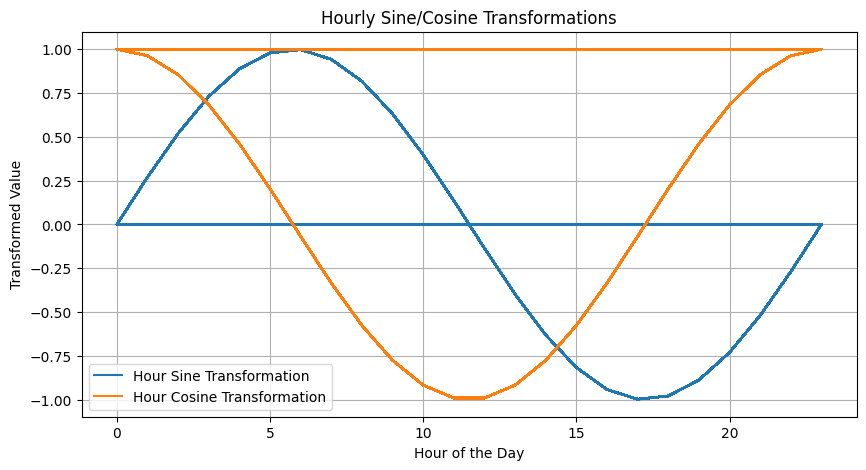

In [55]:
# Hourly Sine/Cosine Transformation

plt.figure(figsize=(10, 5))
plt.plot(energy.index.hour, energy['hour_sin'], label='Hour Sine Transformation')
plt.plot(energy.index.hour, energy['hour_cos'], label='Hour Cosine Transformation')
plt.xlabel('Hour of the Day')
plt.ylabel('Transformed Value')
plt.title('Hourly Sine/Cosine Transformations')
plt.legend()
plt.grid(True)
plt.show()


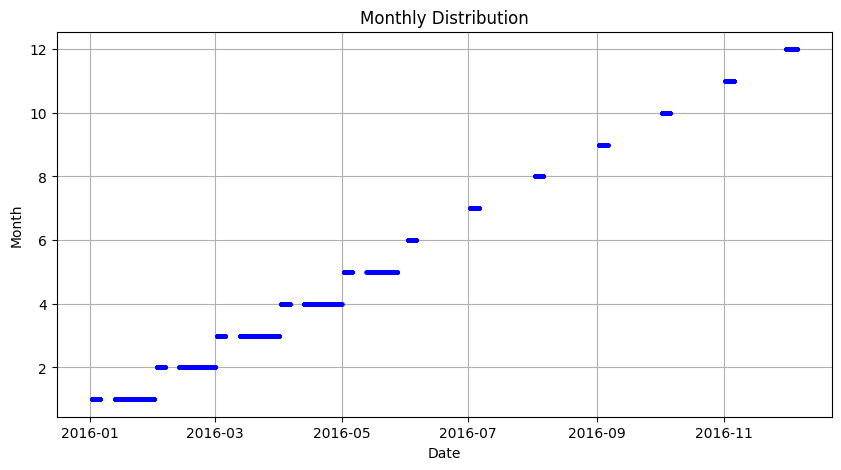

In [56]:
# Monthly Distribution
plt.figure(figsize=(10, 5))
plt.plot(energy.index, energy['month'], 'bo', markersize=2)
plt.xlabel('Date')
plt.ylabel('Month')
plt.title('Monthly Distribution')
plt.grid(True)
plt.show()

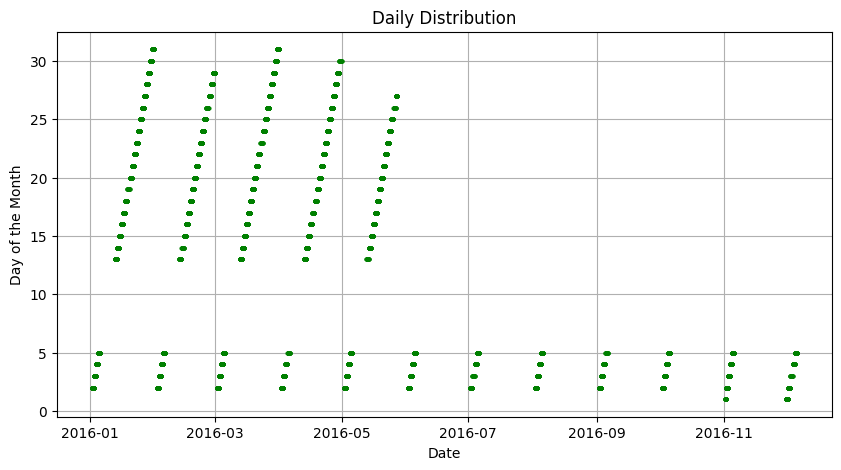

In [57]:
# Daily Distribution
plt.figure(figsize=(10, 5))
plt.plot(energy.index, energy['day'], 'go', markersize=2)
plt.xlabel('Date')
plt.ylabel('Day of the Month')
plt.title('Daily Distribution')
plt.grid(True)
plt.show()

When considering cyclic features such as hour, month, and day, encoding using sine/cosine transformations was explored to normalize the range and reduce data discontinuity. However, month and day features were deemed unsuitable for this transformation due to incomplete cycles and lack of consistency, respectively. Instead, sine/cosine transformations were applied solely to the hourly data. By incorporating both sine and cosine encoding, unique values were ensured within a cycle, addressing potential challenges arising from symmetrical nature of sine encoding. This transformation provided enhanced precision and normalized the range from 0-24 to -1 to +1, ensuring uniform weightage to each hour and preventing individual hours from disproportionately influencing model performance[2].

Hence we will remove the unwanted columns from our dataset. We will also remove the season column since we already have it encoded.

In [58]:
cols_to_drop = ['month_sin','month_cos','day_sin','day_cos','season']
energy.drop(cols_to_drop, axis=1, inplace=True)
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Tdewpoint,hour,month,day,season_numeric,hour_sin,hour_cos
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,5.3,17,11,1,0,-0.997669,-0.068242
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,5.2,17,11,1,0,-0.997669,-0.068242
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,5.1,17,11,1,0,-0.997669,-0.068242
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,5.0,17,11,1,0,-0.997669,-0.068242
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,4.9,17,11,1,0,-0.997669,-0.068242


In [59]:
# Updating the features list
features = energy.columns.tolist()


<ipython-input-60-23087998856b>:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



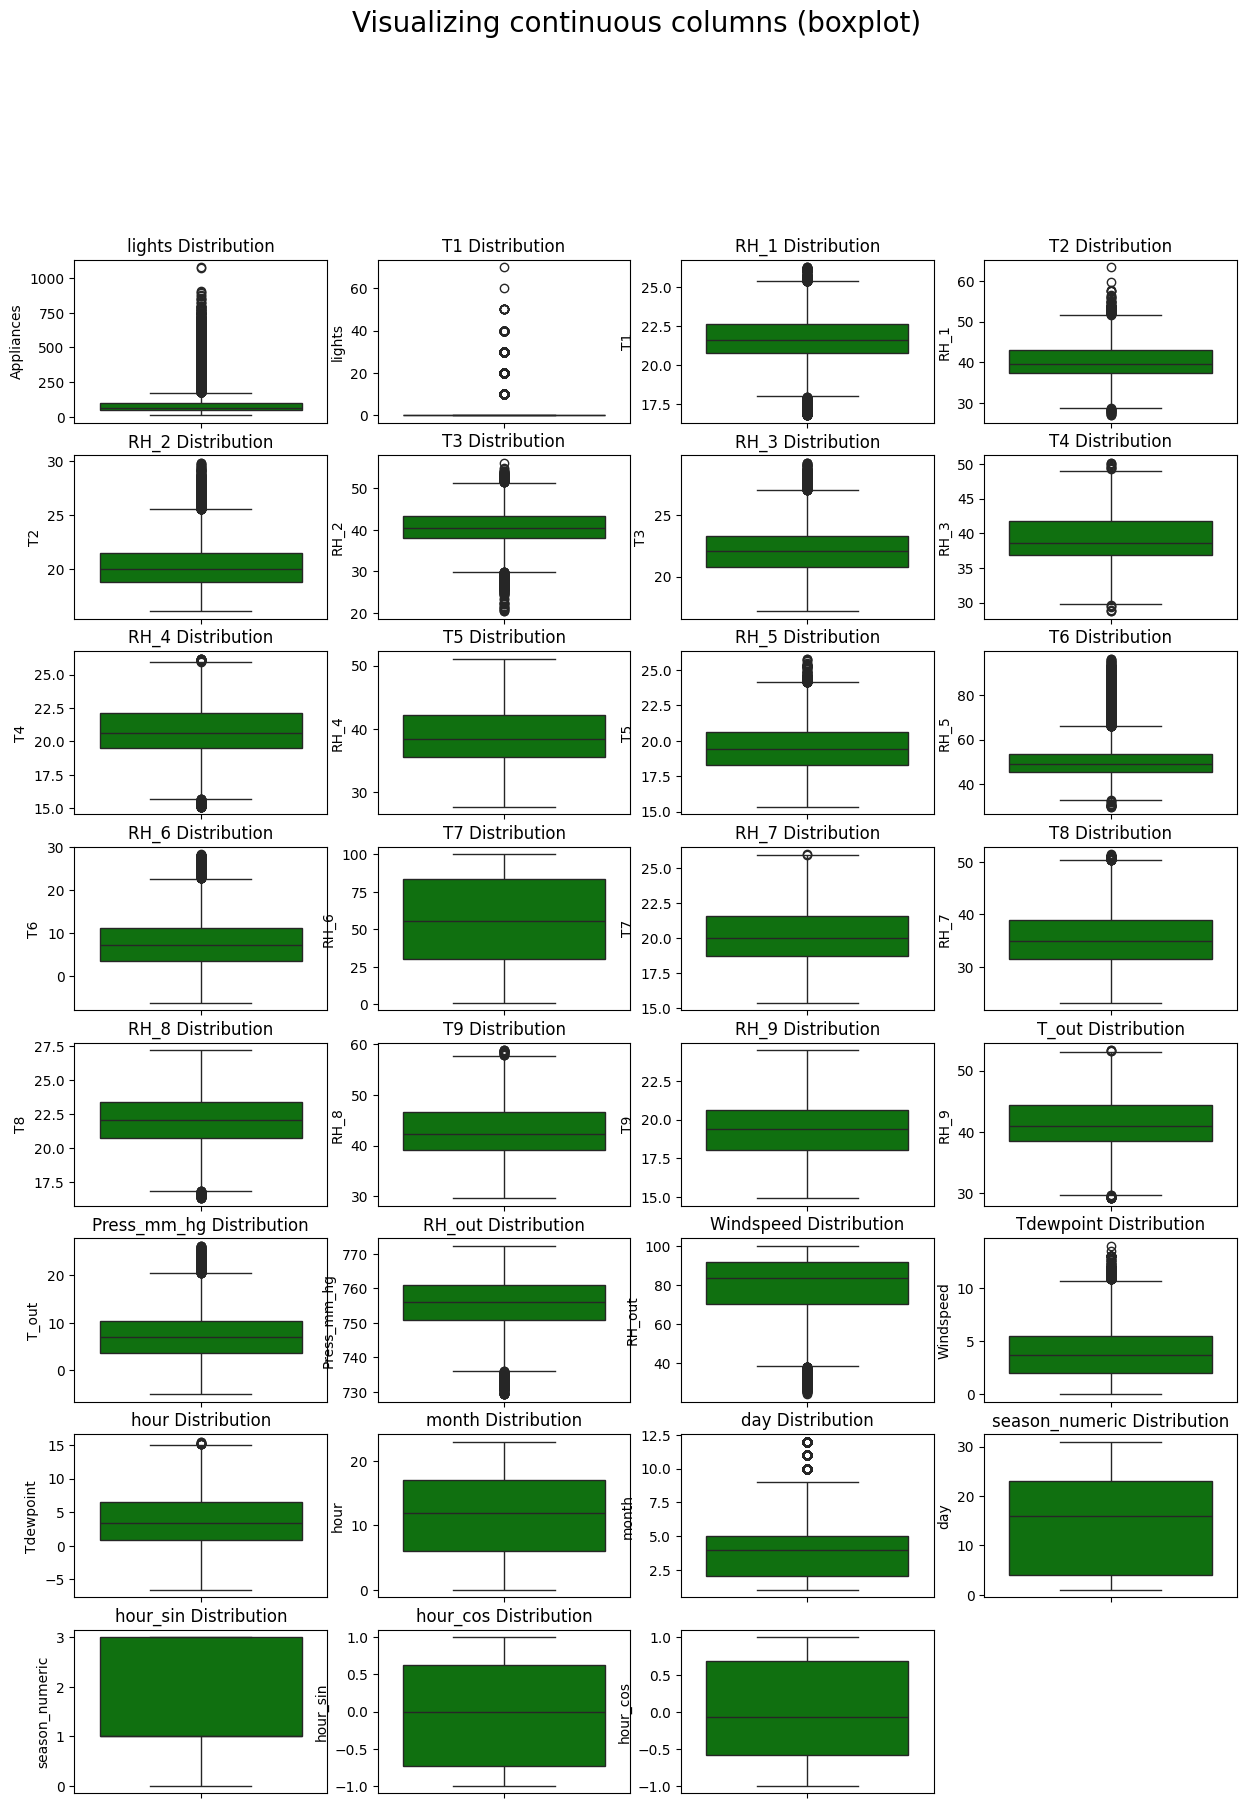

In [60]:
def plot_vis_box(dataset,numeric):
  i=1
  plt.figure(figsize=(15,25))
  for feature in numeric:
    plt.title("{feature} Distribution".format(feature = feature))
    plt.subplot(10,4,i)
    sns.boxplot(y=dataset[feature],color='green')
    i+=1
  plt.suptitle("Visualizing continuous columns (boxplot)",fontsize=20)
  return plt.show()

plot_vis_box(energy, features)

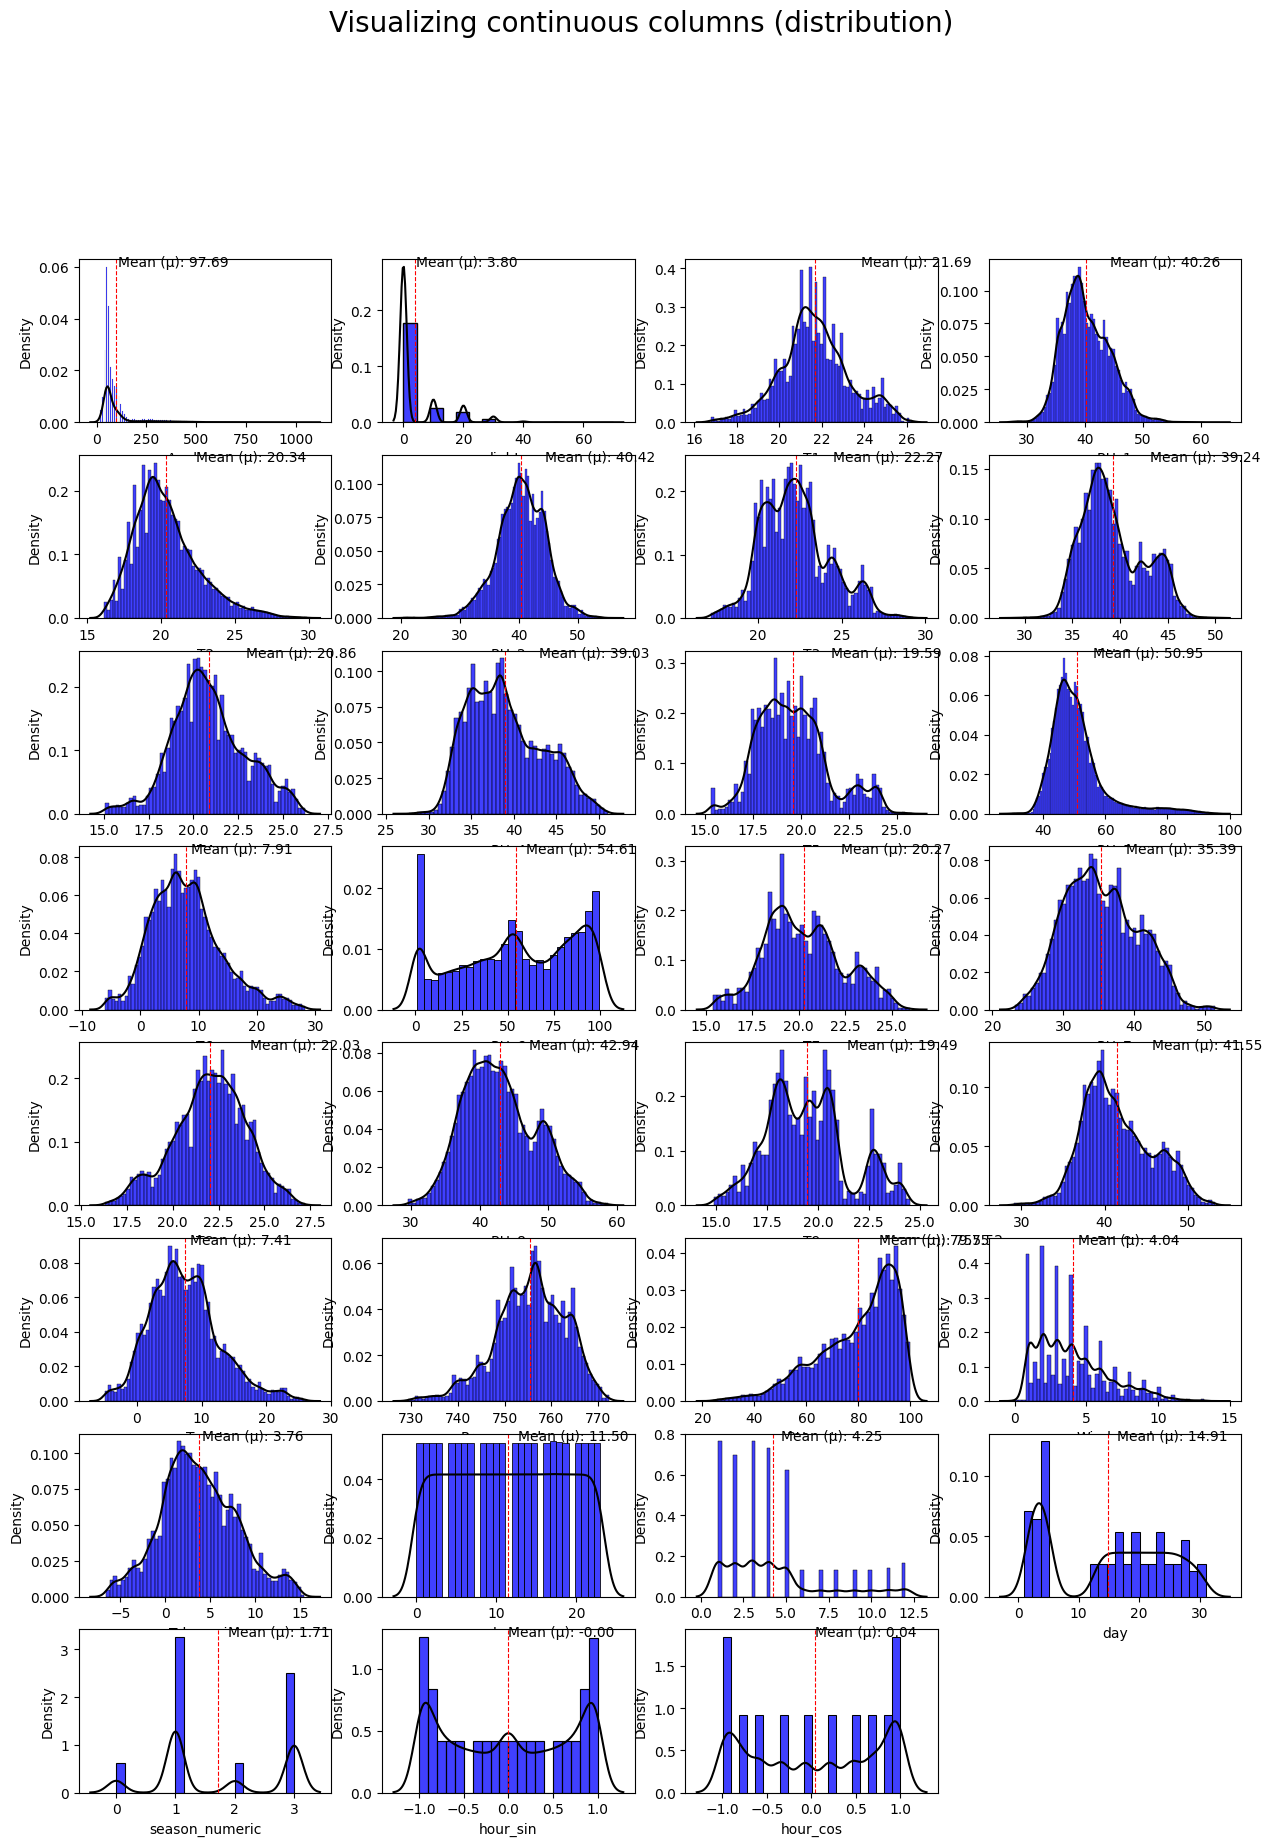

In [61]:
def plot_vis_distr(dataset,numeric):
  i=1
  plt.figure(figsize=(15,25))
  for feature in numeric:
    plt.subplot(10,4,i)
    sns.histplot(dataset[feature], stat='density',color='blue')
    sns.kdeplot(dataset[feature], color='black')
    plt.axvline(dataset[feature].mean(), color='red', linestyle='--', linewidth=0.8)
    min_ylim, max_ylim = plt.ylim()
    plt.text(dataset[feature].mean()*1.1, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(dataset[feature].mean()))
    i+=1
  plt.suptitle("Visualizing continuous columns (distribution)",fontsize=20)
  return plt.show()

plot_vis_distr(energy,features)

From the boxplots and distribution graphs, we can see that their are outliers in our dataset and the data is also not normally distributed.

 MinMaxScaler is sensitive to outliers, as it scales data based on the minimum and maximum values of each feature. It is beneficial for our analysis to handle the outliers.


In [62]:
# remove the appliances column and create a variable y
# y = energy['Appliances']

In [63]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import pandas as pd
# scaler = RobustScaler()
scaler = MinMaxScaler()
energy_scaled = pd.DataFrame(scaler.fit_transform(energy), columns=energy.columns)
energy_scaled

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Tdewpoint,hour,month,day,season_numeric,hour_sin,hour_cos
0,0.046729,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.097674,0.894737,0.500000,0.538462,0.739130,0.909091,0.000000,0.000000,0.000000,0.463380
1,0.046729,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.100000,0.894737,0.476190,0.533937,0.739130,0.909091,0.000000,0.000000,0.000000,0.463380
2,0.037383,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.102326,0.894737,0.452381,0.529412,0.739130,0.909091,0.000000,0.000000,0.000000,0.463380
3,0.037383,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.104651,0.894737,0.428571,0.524887,0.739130,0.909091,0.000000,0.000000,0.000000,0.463380
4,0.046729,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.106977,0.894737,0.404762,0.520362,0.739130,0.909091,0.000000,0.000000,0.000000,0.463380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.000000,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,...,0.602326,0.416667,0.238095,0.900452,0.739130,0.363636,0.866667,0.333333,0.000000,0.463380
19731,0.074766,0.000000,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,...,0.602326,0.421053,0.250000,0.900452,0.739130,0.363636,0.866667,0.333333,0.000000,0.463380
19732,0.242991,0.142857,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,...,0.602326,0.425439,0.261905,0.900452,0.739130,0.363636,0.866667,0.333333,0.000000,0.463380
19733,0.383178,0.142857,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,...,0.602326,0.429825,0.273810,0.895928,0.739130,0.363636,0.866667,0.333333,0.000000,0.463380


In [64]:
# prompt: split the energy scaled data with first 70% rows to training, next 15% to validation and last 15% to testing data. Remove the Appliances columns from each and set it to y

train_rows = int(0.7 * len(energy_scaled))
valid_rows = int(0.15 * len(energy_scaled))
test_rows = len(energy_scaled) - train_rows - valid_rows

train = energy_scaled.iloc[:train_rows, :]
valid = energy_scaled.iloc[train_rows:train_rows+valid_rows, :]
test = energy_scaled.iloc[train_rows+valid_rows:, :]

y_train = train['Appliances']
y_val = valid['Appliances']
y_test = test['Appliances']

X_train = train.drop('Appliances', axis=1)
X_val = valid.drop('Appliances', axis=1)
X_test = test.drop('Appliances', axis=1)

print(X_train.shape, X_val.shape, X_test.shape)


(13814, 30) (2960, 30) (2961, 30)


### 4. Implement, train and test prediction models

We will employee two major models for the predictions.
1. ARIMA( Auto Regressive Integrated Moving Average) model.
2. LSTM

* ARIMA Model stands for autoregressive integrated moving average, a statistical model that predicts future trends based on past time-series[5]

* For our ARIMA we have used auto ARIMA model which has an automated approach to configuring the ARIMA model, which is used for time-series forecasting. It selects the best model by fitting multiple variations and comparing their performance.

* ARIMA Model stands for autoregressive integrated moving average, a statistical model that predicts future trends based on past time-series.

* The ARIMA model is composed of three parts: AR (autoregressive), I (integrated), and MA (moving average), with parameters p, d, and q respectively.

* Auto-ARIMA saves time, reduces human error, and eliminates the need for in-depth statistical knowledge for model selection.

As we predicted some seasonal trends in our analysis, we have set the seasonal parameter of our auto arima model ***TRUE***. Similarly *trace* is also set as TRUE to see all the possible values of p, d and q that can be used.

We have created a function that will apply the Auto ARIMA model and return the evaluation metrics like rmse, mae and r-squared error.

In [65]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.9 MB/s eta 0:00:00


In [66]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [67]:
# prompt: Write a function to implement auto arima model on my data with X_train, X_valid and X_test and the labels y_train, y_valid, y_test. Also find out the root mean square, mean squared error and r-squared error. Also import all the libraries that are required
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def auto_arima_model(X_train, X_valid, X_test, y_train, y_valid, y_test):
  """
  This function implements the Auto ARIMA model and returns the evaluation metrics.

  Args:
    X_train (pd.DataFrame): Training features.
    X_valid (pd.DataFrame): Validation features.
    X_test (pd.DataFrame): Test features.
    y_train (pd.Series): Training labels.
    y_valid (pd.Series): Validation labels.
    y_test (pd.Series): Test labels.

  Returns:
    tuple: A tuple containing the following:
      - model (pmdarima.arima.AutoARIMA): The fitted Auto ARIMA model.
      - rmse (float): Root mean squared error on the test set.
      - mae (float): Mean absolute error on the test set.
      - r2 (float): R-squared error on the test set.
  """

  model = pm.auto_arima(y_train, seasonal=True, trace=True) #Weekly seasonality visible from the graphs above
  model.fit(y_train)

  # Make predictions
  forecast_valid, valid_conf_int = model.predict(len(X_valid), return_conf_int=True)
  forecast_test, test_conf_int = model.predict(len(X_test), return_conf_int=True)

  # Evaluate the model
  rmse_valid = np.sqrt(mean_squared_error(y_valid, forecast_valid))
  mae_valid = mean_absolute_error(y_valid, forecast_valid)
  r2_valid = r2_score(y_valid, forecast_valid)

  rmse_test = np.sqrt(mean_squared_error(y_test, forecast_test))
  mae_test = mean_absolute_error(y_test, forecast_test)
  r2_test = r2_score(y_test, forecast_test)

  print("Validation RMSE:", rmse_valid)
  print("Validation MAE:", mae_valid)
  print("Validation R2:", r2_valid)

  print("Test RMSE:", rmse_test)
  print("Test MAE:", mae_test)
  print("Test R2:", r2_test)

  return model, rmse_test, mae_test, r2_test

model, rmse, mae, r2 = auto_arima_model(X_train, X_val, X_test, y_train, y_val, y_test)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-36829.402, Time=39.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-24447.260, Time=3.85 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-36289.967, Time=1.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-32624.519, Time=15.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-17198.622, Time=0.79 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-36603.941, Time=17.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-36444.430, Time=10.89 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-36839.014, Time=28.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-36831.460, Time=26.14 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-36746.925, Time=31.29 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-36720.765, Time=40.53 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-36725.415, Time=26.88 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-36683.790, Time=33.76 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-36796.760, Time=45.9

In [69]:
# prompt: Write a function to implement LSTM model on the same data and plot the predictions vs true value
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
def lstm_model(X_train, X_val, X_test, y_train, y_val, y_test):
    # Reshape the data
    X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
    X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    rsquared = r2_score(y_test, predictions)

    print('RMSE on Test Set:', rmse)
    print('MAE on Test Set:', mae)
    print('R-squared on Test Set:', rsquared)

    return model, rmse, mae, rsquared

# Example usage:
lstm_model1, rmse, mae, rsquared = lstm_model(X_train, X_val, X_test, y_train, y_val, y_test)


Epoch 1/20
432/432 [==============================] - 16s 9ms/step - loss: 0.0089
Epoch 2/20
432/432 [==============================] - 4s 9ms/step - loss: 0.0083
Epoch 3/20
432/432 [==============================] - 5s 12ms/step - loss: 0.0082
Epoch 4/20
432/432 [==============================] - 4s 9ms/step - loss: 0.0081
Epoch 5/20
432/432 [==============================] - 4s 9ms/step - loss: 0.0079
Epoch 6/20
432/432 [==============================] - 5s 12ms/step - loss: 0.0079
Epoch 7/20
432/432 [==============================] - 2s 5ms/step - loss: 0.0077
Epoch 8/20
432/432 [==============================] - 2s 5ms/step - loss: 0.0077
Epoch 9/20
432/432 [==============================] - 2s 5ms/step - loss: 0.0076
Epoch 10/20
432/432 [==============================] - 2s 5ms/step - loss: 0.0075
Epoch 11/20
432/432 [==============================] - 3s 6ms/step - loss: 0.0074
Epoch 12/20
432/432 [==============================] - 3s 6ms/step - loss: 0.0074
Epoch 13/20
432/432 [=

### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results


Compare with the results you have obtained in Assignment 1a.

In the previous assignment, we obtained the best results from the the Gradient Boosting Regressor model. However, there were a few differences in analysis and pre-processing of the data. The following table summarises all these differences and the different results obtained in both the cases.

|     | Assignment 1a | Assignment 1b |
|---------|-----|--------|
| variables dropped    | 'Visibility', 'Tdewpoint','rv1','rv2','week_status', 'Day_of_Week','day_of_week','weekend' |'Visibility','rv1','rv2','month_sin','month_cos','day_sin','day_cos','season'  |
| Transformation   | logarthmic transformation  | Normalisation |
| Scaling     | No Scaler was used  | MinMaxScaler was employed   |
| Seasonal trends | No seasonal trends were considered | Seasonal trends were studied |
| Stationarity of data | Stationarity of the data was not considered | The data was checked for stationarity |
| Models | Gradient Boosting Regressor, Support Vector Regressor, Random Forest Regressor | ARIMA, LSTM |
| evaluation metrics used | RMSE, MAE, R-squared error | RMSE, MAE, R-squared error |
| Best performance| Gradient Boosting Regressor | LSTM |


As illustrated in the table provided, there are several disparities between the approaches. In this task, we have refined the data more meticulously and endeavored to cleanse it with greater intricacies. The outcomes achieved in Assignment 1a and Assignment 1b are as follows:

| Model   | Gradient Boosting Regressor | LSTM |
|---------|------------------------------|-----------------------------|
| RMSE    | 0.14                         | 0.08                        |
| MAE     | 0.09                         | 0.04                        |
| R-squared| 0.34                         | 0.013                        |

In general, the LSTM model proves to be more suitable for our dataset. Aside from the evaluation metrics, LSTM exhibits superior computational efficiency and produces higher-quality graphs compared to other models.

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

Completing this assignment has been a valuable learning experience, particularly in the realm of data preprocessing techniques and tackling diverse datasets effectively. I've gained insights into various approaches to handling data, which is crucial as it underscores the importance of tailoring methodologies to the specific characteristics of each dataset.

One key takeaway is the realization that model fitting is not a one-size-fits-all process. It heavily depends on the nature of the problem at hand, and there exist myriad strategies to address it. By experimenting with different preprocessing methods and models, I've come to appreciate the nuanced nature of model selection and tuning.

While we incorporated seasonal trends into our analysis, there remains room for further exploration into how these trends impact our findings. Delving deeper into seasonal effects could unveil more intricate patterns within the data, enhancing the depth of our analysis and potentially leading to more informed decision-making.

Moreover, this assignment has highlighted the vast landscape of models available for time series analysis. While we explored models like ARIMA and LSTM, there are numerous other techniques waiting to be tested. Exploring alternative models could provide additional insights and potentially improve the accuracy and robustness of our predictions.

In moving forward, I plan to continue refining our models by:

1. Exploring advanced preprocessing techniques to further enhance the quality of our data.
2. Experimenting with different feature engineering methods to extract more meaningful insights from the dataset.
3. Conducting thorough model evaluation and tuning to optimize performance.
4. Continuously assessing and incorporating new models or techniques that could potentially offer superior performance.
5. Collaborating with peers and seeking feedback to gain new perspectives and refine our approach further.

Overall, this assignment has been instrumental in expanding my understanding of data analysis and modeling techniques. By applying these learnings and continuously seeking improvement, I aim to develop more accurate and effective models in future projects.

### 7. References

[1] Candanedo, L., 2017. Appliances energy prediction data set. UCI Machine Learning Repository.

[2] Assadian, C.F. and Assadian, F., 2023. Data-Driven Modeling of Appliance Energy Usage. Energies, 16(22), p.7536.

[3] Krishnan, S. (2021) 'What is Stationarity in Time Series? How it can be detected?', CodeX, October 19. Available at: https://medium.com/codex/what-is-stationarity-in-time-series-how-it-can-be-detected-35e36b79a112 (Accessed: March 16, 2024).

[4] Zubkov, G. (1 year ago) 'Residential Power. Prophet with TimeSeries', Kaggle Notebook. Available at: https://www.kaggle.com/code/georgyzubkov/residential-power-prophet-with-timeseries (Accessed: March 16, 2024).

[5] Pulagam, S., 2022. Time series forecasting using Auto ARIMA in python. Available at: https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd Accessed: March 16, 2024).